In [1]:


from ipywidgets import interact

%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from igraph import *

# igraph plot

In [2]:
g = Graph.Read_Pajek('../cm_ml/data/USAir97.net')
layout = g.layout_auto() 
#g.vs["label"] = names
#g.vs["color"] = [color_dict[gender] for gender in g.vs["gender"]]
plot(g, layout=layout)

# Basic usage

In [7]:
def random_lobster(n, m, k, p):
    return nx.random_lobster(n, p, p / m)

def powerlaw_cluster(n, m, k, p):
    return nx.powerlaw_cluster_graph(n, m, p)

def erdos_renyi(n, m, k, p):
    return nx.erdos_renyi_graph(n, p)

def newman_watts_strogatz(n, m, k, p):
    return nx.newman_watts_strogatz_graph(n, k, p)

def plot_random_graph(n, m, k, p, generator):
    g = generator(n, m, k, p)
    nx.draw(g)
    plt.show()

In [8]:
interact(plot_random_graph, n=(2,30), m=(1,10), k=(1,10), p=(0.0, 1.0, 0.001),
         generator={
             'lobster': random_lobster,
             'power law': powerlaw_cluster,
             'Newman-Watts-Strogatz': newman_watts_strogatz,
             u'Erdős-Rényi': erdos_renyi,
         });

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0xNiwgZGVzY3JpcHRpb249dSduJywgbWF4PTMwLCBtaW49MiksIEludFNsaWRlcih2YWx1ZT01LCBkZXNjcmlwdGlvbj11J23igKY=


In [3]:
# https://ipywidgets.readthedocs.io/en/latest/examples/Output%20Widget.html#Output-widgets-as-the-foundation-for-interact
import ipywidgets as widgets

a = widgets.IntSlider(description='a')
b = widgets.IntSlider(description='b')
c = widgets.IntSlider(description='c')
def f(a, b, c):
    print('{}*{}*{}={}'.format(a, b, c, a*b*c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

widgets.HBox([widgets.VBox([a, b, c]), out])

SEJveChjaGlsZHJlbj0oVkJveChjaGlsZHJlbj0oSW50U2xpZGVyKHZhbHVlPTAsIGRlc2NyaXB0aW9uPXUnYScpLCBJbnRTbGlkZXIodmFsdWU9MCwgZGVzY3JpcHRpb249dSdiJyksIEludFPigKY=


In [4]:
# https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Styling.html#Examples
from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider

form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

form_items = [
    Box([Label(value='Age of the captain'), IntSlider(min=40, max=60)], layout=form_item_layout),
    Box([Label(value='Egg style'),
         Dropdown(options=['Scrambled', 'Sunny side up', 'Over easy'])], layout=form_item_layout),
    Box([Label(value='Ship size'),
         FloatText()], layout=form_item_layout),
    Box([Label(value='Information'),
         Textarea()], layout=form_item_layout)
]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))
form

Qm94KGNoaWxkcmVuPShCb3goY2hpbGRyZW49KExhYmVsKHZhbHVlPXUnQWdlIG9mIHRoZSBjYXB0YWluJyksIEludFNsaWRlcih2YWx1ZT00MCwgbWF4PTYwLCBtaW49NDApKSwgbGF5b3V0PUzigKY=


# example: comtrade + py3plex

algorithms imported..
Core statistics imported..


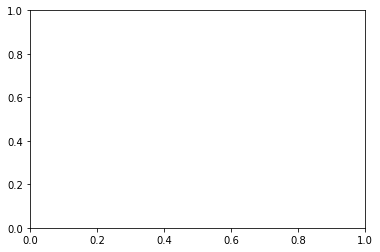

In [3]:
from py3plex.core import multinet
from py3plex.algorithms.statistics.basic_statistics import *
from py3plex.visualization.multilayer import *
from py3plex.algorithms.community_detection import community_wrapper as cw
from py3plex.visualization.colors import colors_default
from collections import Counter

from comtrade_multiplex import *

year="2000"    
ROOT_DIR = '/home/aurelien/local/data/comtrade'
PATH = '{}/comtrade_ots_data_agg_{}.csv'.format(ROOT_DIR,year)
path = PATH
# bypass standard parsers
directed = True
(G,labels) = parse_multiplex_edges2(path,directed)
mplex = multinet.multi_layer_network()
mplex.core_network = G
mplex.labels=labels


In [6]:
#sub_net = mplex.subnetwork(['0'],subset_by="layers")  
#agg_net = sub_net.aggregate_edges() 

# plot

def plot_graph(n):
    sub_net = mplex.subnetwork([str(n)],subset_by="layers")  
    agg_net = sub_net.aggregate_edges()
    pos = nx.spring_layout(agg_net, iterations=10)
    nx.draw(agg_net, pos, node_size=0, alpha=0.4, edge_color='r', font_size=16, with_labels=True)
    plt.show()
    
interact(plot_graph, n=(0,9) );

interactive(children=(IntSlider(value=4, description='n', max=9), Output()), _dom_classes=('widget-interact',)…